# View  Spectraction Results in OGA

 work with Weakly_2023_11
- use jupyter kernel LSST
- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2023/04/05
- last update : 2023/04/07

- Spectractor https://github.com/lsst/Spectractor/
- Spectractor Version 2.4
- branch lsst-dev
- available in version w_2023_11 by default


In [1]:
! eups list -s | grep LOCAL

atmospec              LOCAL:/home/d/dagoret/repos/repos_w_2023_11/atmospec 	setup
eups                  LOCAL:/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-5.1.0/eups 	setup


In [2]:
! eups list -s lsst_distrib

   gdf42428520+c82c1836b5 	current w_2023_11 setup


In [3]:
import h5py

In [4]:
import lsst.daf.butler as dafButler
#import lsst.summit.utils.butlerUtils as butlerUtils

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import matplotlib.ticker                         # here's where the formatter is
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

from astropy.visualization import (MinMaxInterval, SqrtStretch,ZScaleInterval,PercentileInterval,
                                   ImageNormalize,imshow_norm)
from astropy.visualization.stretch import SinhStretch, LinearStretch,AsinhStretch,LogStretch


import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re
import pandas as pd

plt.rcParams["figure.figsize"] = (4,3)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'
plt.rcParams.update({'figure.max_open_warning': 0})

In [6]:
import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend('matplotlib')

In [7]:
from astropy.time import Time
import astropy.units as u

## Config

### Butler

In [8]:
#repo =  "/sdf/group/rubin/repo/main"
#repo = "/sdf/group/rubin/repo/oga/"
repo = "/repo/embargo/"
butler = dafButler.Butler(repo)
registry = butler.registry

### Date & Filter & Disperser & collection

- make your choice

In [9]:
DateToRuncollection = {
    
    
 # september 2022
 20220912 :  "u/dagoret/BPS_manyspectro_v60", # Missing collection
 20220913 :  "u/dagoret/BPS_manyspectro_v61", # Missing collection
 20220914 :  "u/dagoret/BPS_manyspectro_v62", # Missing collection  
    
 20220927 :  "u/dagoret/BPS_manyspectro_v63", # Mount errors available, mitigé
 20220928 :  "u/dagoret/BPS_manyspectro_v64", # Mount errors available, very nice spectra
 20220929 :  "u/dagoret/BPS_manyspectro_v65", # Mount errors available, very nice spectra
    
    
 # october 2022
 20221012 :  "u/dagoret/BPS_manyspectro_v56", # mount errors , nice, all good
 20221025 :  "u/dagoret/BPS_manyspectro_v57", # mount errors, very very bad spectra, run not selected
 20221026 :  "u/dagoret/BPS_manyspectro_v58", # mount errors,  very nice spectra, all good
 20221027 :  "u/dagoret/BPS_manyspectro_v59", # mount errors,  nice spectra, all good
    
 # november 2022
 20221109 :  "u/dagoret/BPS_manyspectro_v53", # mount errors, nice spectra, few bad labelled as good 
 20221110 :  "u/dagoret/BPS_manyspectro_v54", # mount errors available, many bad rec spectra, few bad labelled as good, versy strange
 20221123 :  "u/dagoret/BPS_manyspectro_v55", # mount errors , nice   
    
 # december 2022   
 20221207 :  "u/dagoret/BPS_manyspectro_v48", # No mount error, nice spectra
 20221208 :  "u/dagoret/BPS_manyspectro_v49", # No mount error, nice spectra, one bad labelled as good
 20221209 :  "u/dagoret/BPS_manyspectro_v50", # No mount error, spectra at distance from optical center, very interesting
 20221210 :  "u/dagoret/BPS_manyspectro_v51", # No mount error, bof
 20221212 :  "u/dagoret/BPS_manyspectro_v52", # No mount error, very bad gains and instability 
    
 #January 2023 
 20230117 :  "u/dagoret/BPS_manyspectro_v79", # no mount errors, some mucol spectra that looks good are rejected on DCCD
 20230118 :  "u/dagoret/BPS_manyspectro_v80", # no mount error, some mucol looking good are rejected, many bad centroid calculation
 20230119 :  "u/dagoret/BPS_manyspectro_v77", # no mount errors, many blurred spectra probably due to strong tracking error
 20230131 :  "u/dagoret/BPS_manyspectro_v78", # missing for moment

 #february 2023
 20230214 :  "u/dagoret/BPS_manyspectro_v42", # no mount errors, nothing special
 20230215 :  "u/dagoret/BPS_manyspectro_v43", # mount errors, OK
 20230216 :  "u/dagoret/BPS_manyspectro_v44", # mount errors, OK, nice spectra 
 20230228 :  "u/dagoret/BPS_manyspectro_v70", # No mount error,OK nice spectra
    
 #march 2023  
 20230301 :  "u/dagoret/BPS_manyspectro_v71", # no mount errors, OK many spectra
 20230302 :  "u/dagoret/BPS_manyspectro_v72", # no mount error, sometime bad subtraction of order2 on HD38666 (mucol) 
 20230315 :  "u/dagoret/BPS_manyspectro_v73", # mount errors
 20230316 :  "u/dagoret/BPS_manyspectro_v74", # mount errors 
    
}

In [10]:
DATE = 20221212
my_collection = DateToRuncollection[DATE]

filterdispersername = "empty~holo4_003"


RUNSELECTION = 20230403

# List of Dataset types avalaible in my collection

## List of dataset types

In [11]:
list(registry.queryDatasetTypes("*spec*"))

[DatasetType('atmospecCentroid', {band, instrument, detector, physical_filter, visit}, StructuredDataDict),
 DatasetType('spectraction', {band, instrument, detector, physical_filter, visit}, Spectraction),
 DatasetType('spectractorImage', {band, instrument, detector, physical_filter, visit}, SpectractorImage),
 DatasetType('spectractorSpectrum', {band, instrument, detector, physical_filter, visit}, SpectractorSpectrum)]

## list of datasets

In [12]:
list(registry.queryDatasets("*spec*", collections=[my_collection]))[:10]

[DatasetRef(DatasetType('atmospecCentroid', {band, instrument, detector, physical_filter, visit}, StructuredDataDict), {instrument: 'LATISS', detector: 0, visit: 2022121200397, ...}, id=7e69a147-62d1-4497-b2a1-be0bd2937b25, run='u/dagoret/BPS_manyspectro_v52/20230313T153822Z'),
 DatasetRef(DatasetType('atmospecCentroid', {band, instrument, detector, physical_filter, visit}, StructuredDataDict), {instrument: 'LATISS', detector: 0, visit: 2022121200419, ...}, id=e70d552c-6bff-4ae5-83f9-b6867a36c0e5, run='u/dagoret/BPS_manyspectro_v52/20230313T153822Z'),
 DatasetRef(DatasetType('atmospecCentroid', {band, instrument, detector, physical_filter, visit}, StructuredDataDict), {instrument: 'LATISS', detector: 0, visit: 2022121200418, ...}, id=a33a3e17-85ea-4927-a84d-503934b00ee2, run='u/dagoret/BPS_manyspectro_v52/20230313T153822Z'),
 DatasetRef(DatasetType('atmospecCentroid', {band, instrument, detector, physical_filter, visit}, StructuredDataDict), {instrument: 'LATISS', detector: 0, visit: 2

### Spectractor

In [13]:
configmode = "PSF2DFFM_REBIN2"
#configmode = "PSF2DFFM_REBIN1"
#ext="_b"
specver="specV2.4"

https://www.pythonforthelab.com/blog/how-to-use-hdf5-files-in-python/

### The collection

In [14]:
datasetRefs = registry.queryDatasets(datasetType='spectractorSpectrum', collections=my_collection, where= "instrument='LATISS'")

## Loop on exposures

In [15]:
all_dataId = []     # full data id
all_spec = []       # spectra
all_exposures = []  # exposure number
all_num = []        # sequence numbers
  

for i, ref in enumerate(datasetRefs):

    print(f"============= ({i}) ============datasetType = spectraction ============================================")
    print("fullId..................:",ref.dataId.full)
    print("visit...................:",ref.dataId["visit"])
    print("band....................:",ref.dataId["band"])
    print("physical filter.........:",ref.dataId["physical_filter"])
    print("run.....................:",ref.run)
    
    #through old runs
    date_of_run = int(ref.run.split("/")[-1].split("T")[0])
    #if date_of_run< RUNSELECTION :
    #    continue
 
    
    
    the_exposure = ref.dataId["visit"]
    the_day_obs = ref.dataId["visit"]//100_000
    the_seq_num = ref.dataId["visit"]- the_day_obs*100_000    
    the_dataId = {'day_obs': the_day_obs,'seq_num':the_seq_num,'detector':0}
    print(the_dataId)
    
 
    spec = butler.get('spectractorSpectrum', visit=the_exposure, detector=0, collections=my_collection, instrument='LATISS')
    
    # save in collection lists
    all_dataId.append(the_dataId) 
    all_exposures.append(the_exposure)
    all_spec.append(spec)
    all_num.append(the_seq_num)
    

============= (0) ============datasetType = spectraction ============================================
fullId..................: {band: 'white', instrument: 'LATISS', detector: 0, physical_filter: 'empty~holo4_003', visit: 2022121200399}
visit...................: 2022121200399
band....................: white
physical filter.........: empty~holo4_003
run.....................: u/dagoret/BPS_manyspectro_v52/20230313T153822Z
{'day_obs': 20221212, 'seq_num': 399, 'detector': 0}
============= (1) ============datasetType = spectraction ============================================
fullId..................: {band: 'white', instrument: 'LATISS', detector: 0, physical_filter: 'empty~holo4_003', visit: 2022121200411}
visit...................: 2022121200411
band....................: white
physical filter.........: empty~holo4_003
run.....................: u/dagoret/BPS_manyspectro_v52/20230313T153822Z
{'day_obs': 20221212, 'seq_num': 411, 'detector': 0}
============= (2) ============datasetType = sp

In [16]:
all_dataId

[{'day_obs': 20221212, 'seq_num': 399, 'detector': 0},
 {'day_obs': 20221212, 'seq_num': 411, 'detector': 0},
 {'day_obs': 20221212, 'seq_num': 406, 'detector': 0},
 {'day_obs': 20221212, 'seq_num': 425, 'detector': 0},
 {'day_obs': 20221212, 'seq_num': 398, 'detector': 0},
 {'day_obs': 20221212, 'seq_num': 407, 'detector': 0},
 {'day_obs': 20221212, 'seq_num': 418, 'detector': 0},
 {'day_obs': 20221212, 'seq_num': 408, 'detector': 0},
 {'day_obs': 20221212, 'seq_num': 416, 'detector': 0},
 {'day_obs': 20221212, 'seq_num': 395, 'detector': 0},
 {'day_obs': 20221212, 'seq_num': 400, 'detector': 0},
 {'day_obs': 20221212, 'seq_num': 417, 'detector': 0},
 {'day_obs': 20221212, 'seq_num': 415, 'detector': 0},
 {'day_obs': 20221212, 'seq_num': 409, 'detector': 0},
 {'day_obs': 20221212, 'seq_num': 426, 'detector': 0},
 {'day_obs': 20221212, 'seq_num': 394, 'detector': 0},
 {'day_obs': 20221212, 'seq_num': 413, 'detector': 0},
 {'day_obs': 20221212, 'seq_num': 414, 'detector': 0},
 {'day_obs

In [17]:
all_dataId[9]

{'day_obs': 20221212, 'seq_num': 395, 'detector': 0}

In [20]:
postisrccd = butler.get('postISRCCD', dataId = all_dataId[9], detector=0, collections=my_collection, instrument='LATISS')

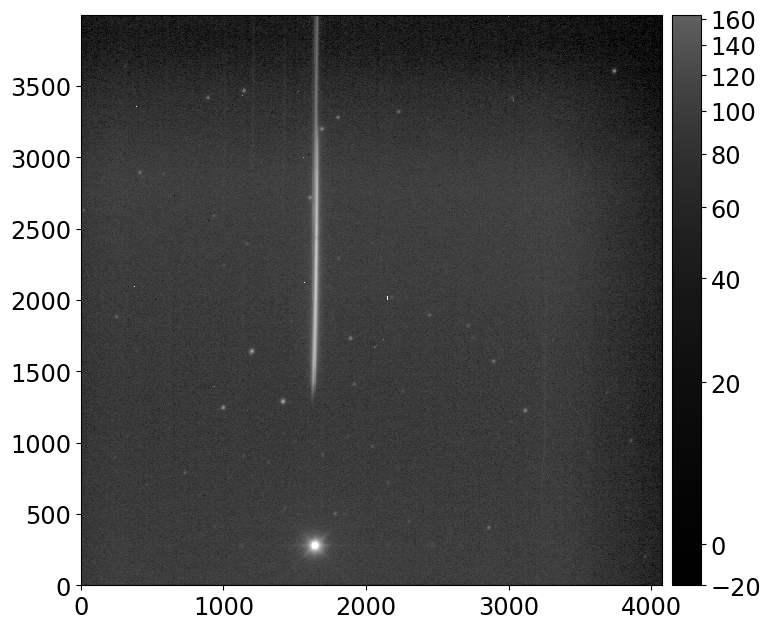

In [22]:
%matplotlib inline
fig = plt.figure(figsize=(8,8))
afw_display = afwDisplay.Display(1)
afw_display.scale('asinh', 'zscale')
afw_display.mtv(postisrccd.image)
#plt.gca().axis('off')

In [26]:
postisrccd.getImage().array

array([[ 2.7985630e+01,  2.5911791e+01,  3.9876995e+01, ...,
         2.0221167e+01,  8.4995222e+00,  7.4920893e+00],
       [ 3.5302269e+01,  3.0816662e+01,  3.7266861e+01, ...,
         1.1177854e+01,  1.0499656e+01,  1.5478188e+01],
       [ 3.8761742e+01,  3.5364372e+01,  3.5285160e+01, ...,
         7.8381248e+00,  1.8910599e+01,  1.8050224e+01],
       ...,
       [ 4.5905991e+01,  4.5905991e+01,  4.5905991e+01, ...,
        -4.2471718e-02,  4.9821081e+00,  6.6325750e+00],
       [ 4.5905991e+01,  4.5905991e+01,  4.5905991e+01, ...,
        -7.8285470e+00,  1.3287736e+01, -6.8005590e+00],
       [ 4.5905991e+01,  4.5905991e+01,  4.5905991e+01, ...,
         3.6538749e+00,  4.9172163e+00, -7.2887254e+00]], dtype=float32)

In [ ]:
index = 0
spec = all_spec[index]

In [ ]:
def DumpSpectrum(spec):
    print("--------------------------------------------")
    print("spec.target.label\t",spec.target.label)
    print("spec.filter_label\t",spec.filter_label)
    print("spec.airmass\t",spec.airmass)
    print("spec.date_obs\t",spec.date_obs)
    print("spec.temperature\t",spec.temperature)
    print("spec.pressure\t",spec.pressure)
    print("spec.humidity\t",spec.humidity)    
    #print("spec.ra\t",spec.ra)
    print("spec.dec\t",spec.dec)
    print("spec.hour_angle\t",spec.hour_angle)
    print("spec.parallactic_angle\t",spec.parallactic_angle)
    print("spec.camera_angle\t", spec.camera_angle)
    print("--------------------------------------------")
    print("spec.order\t",spec.order)
    print("spec.lambdas\t",spec.lambdas)
    print("spec.data\t",spec.data)
    print("spec.err\t",spec.err)
    print("spec.covmatrix\t",spec.cov_matrix)
    print("--------------------------------------------")
    print("spec.data_next_order\t",spec.data_next_order)
    print("spec.err_next_order\t",spec.err_next_order)

In [ ]:
DumpSpectrum(spec)

In [ ]:
postisrccd = butler.get('postISRCCD', visit=the_exposure, detector=0, collections=my_collection, instrument='LATISS')